<a href="https://colab.research.google.com/github/ramy-arab/Brain-Tumor-Detection/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import shutil
import glob

In [3]:
!git clone https://github.com/ramy-arab/Brain-Tumor-Detection.git

Cloning into 'Brain-Tumor-Detection'...
remote: Enumerating objects: 4064, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4064 (delta 1), reused 0 (delta 0), pack-reused 4060 (from 1)
Receiving objects: 100% (4064/4064), 92.36 MiB | 16.30 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (4601/4601), done.


In [4]:
#cout the number of images in respective classes 0: brain tumor, 1: healthey
ROOT_DIR = "/content/Brain-Tumor-Detection"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
number_of_images.items()
print(number_of_images)

{'.git': 11, '.ipynb_checkpoints': 0, 'Healthy': 2087, 'Brain Tumor': 2513}


####Split data
70% : training
15% : testing
15% : validation

In [5]:
import os
import shutil
import numpy as np
import math

# Define the root directory of your dataset
ROOT_DIR = '/content/Brain-Tumor-Detection'  # Change this to your dataset path

# Count the number of images in each category (excluding hidden directories)
number_of_images = {
    dir: len(os.listdir(os.path.join(ROOT_DIR, dir)))
    for dir in os.listdir(ROOT_DIR)
    if os.path.isdir(os.path.join(ROOT_DIR, dir)) and not dir.startswith('.')
}

def dataFolder(p, split):
    # Create the train/val/test folder if it does not exist
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

        for dir in os.listdir(ROOT_DIR):
            dir_path = os.path.join(ROOT_DIR, dir)

            # Check if it's a directory and not a hidden directory like .git
            if not os.path.isdir(dir_path) or dir.startswith('.'):
                continue

            # Create category-specific folders inside the split folder
            os.makedirs("./"+p+"/"+dir, exist_ok=True)

            # Number of images to move, ensuring it's non-negative
            num_images_to_select = math.floor(split * number_of_images[dir])
            if num_images_to_select < 5:
                print(f"Not enough images in {dir} to move for {p} set. Need at least 5 to proceed.")
                continue  # Skip if not enough images

            # Randomly select images to move
            images_in_dir = os.listdir(dir_path)
            selected_images = np.random.choice(images_in_dir, size=num_images_to_select, replace=False)

            for img in selected_images:
                src = os.path.join(dir_path, img)
                dest = os.path.join("./"+p, dir)

                if os.path.isfile(src):
                    shutil.copy(src, dest)
                    os.remove(src)
            print(f"Moved {num_images_to_select} images from {dir} to {p} set.")
    else:
        print(f"{p} folder already exists.")

# Example usage:
dataFolder("train", 0.7)  # 70% of images for training
dataFolder("val", 0.15)   # 15% of images for validation
dataFolder("test", 0.15)  # 15% of images for testing


Moved 1460 images from Healthy to train set.
Moved 1759 images from Brain Tumor to train set.
Moved 313 images from Healthy to val set.
Moved 376 images from Brain Tumor to val set.
Moved 313 images from Healthy to test set.
Moved 376 images from Brain Tumor to test set.


###Model Building

In [6]:
!pip install keras tensorflow


In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, GlobalAvgPool2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
# CNN Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

###Preparing our data using Data Generator

In [10]:
def preprocessingImages1(path):
  """
  input: Path
  output: Preprocessed images
  """
  image_data = ImageDataGenerator(
      rescale = 1/255,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True
  ) # data augmentation
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary'
  )
  return image

In [11]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 3219 images belonging to 2 classes.


In [12]:
def preprocessingImages2(path):
  """
  input: Path
  output: Preprocessed images
  """
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(
      directory = path,
      target_size = (224,224),
      batch_size = 32,
      class_mode = 'binary'
  )
  return image

In [13]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 689 images belonging to 2 classes.


In [14]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 689 images belonging to 2 classes.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet

In [16]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
for layer in base_model.layers:
  layer.trainable = False



In [20]:
X= Flatten()(base_model.output)

X= Dense(units=1, activation='sigmoid')(X)

# Define the complete model
model = Model(inputs=base_model.input, outputs=X)

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [21]:
model.compile(optimizer='rmsprop', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [22]:
# Early stopping and model chek point

from keras.callbacks import EarlyStopping, ModelCheckpoint

#model check point
mc = ModelCheckpoint(filepath="./best_model.keras",
                     monitor='val_accuracy',
                     verbose=1,
                     save_best_only=True,
                     mode='auto')

#early stopping

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode="auto")



# puting call back in a list
cd = [mc, es]

In [24]:
hist = model.fit(
    train_data,
    steps_per_epoch=8,
    epochs=30,
    validation_data=val_data,
    validation_steps=16,
    callbacks=cd
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.5520 - loss: 6.7870
Epoch 1: val_accuracy improved from -inf to 0.76562, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 837ms/step - accuracy: 0.5562 - loss: 6.7851 - val_accuracy: 0.7656 - val_loss: 2.5120
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7248 - loss: 2.8965
Epoch 2: val_accuracy improved from 0.76562 to 0.89266, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 862ms/step - accuracy: 0.7328 - loss: 2.7738 - val_accuracy: 0.8927 - val_loss: 0.5780
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.8709 - loss: 0.7114
Epoch 3: val_accuracy did not improve from 0.89266
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 921ms/step - accuracy: 0.8683 - loss: 0.7392 - val_accuracy: 0.8652 - val_loss: 0.8031
Epoch 4/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7560 - loss: 2.3172
Epoch 4: val_accuracy improved from 0.89266 to 0.92090, saving model to ./best_model.kera

###Model Training

In [25]:
# Model Graphical Interpretation

h= hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

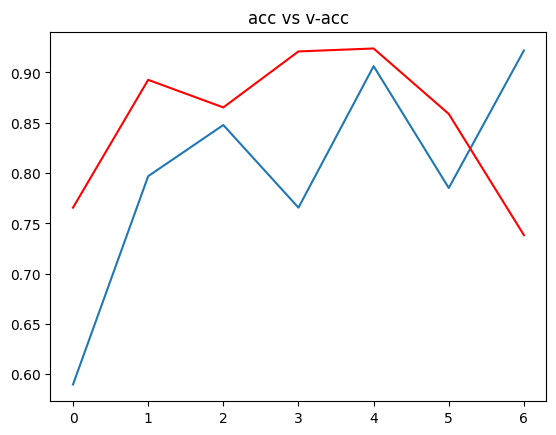

In [26]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

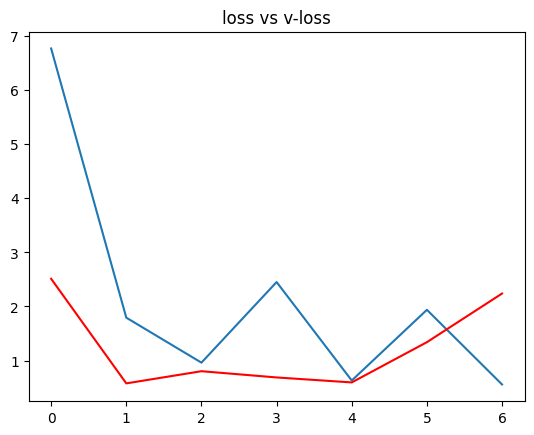

In [27]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [28]:
from keras.models import load_model
model = load_model("/content/best_model.keras")

# Model Accuracy

In [29]:

# Evaluate the model using the test data
loss, accuracy = model.evaluate(test_data)  # or replace with your test generator
print(f"Our model accuracy is {accuracy * 100:.2f} %")


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9278 - loss: 0.4926
Our model accuracy is 92.02 %


In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


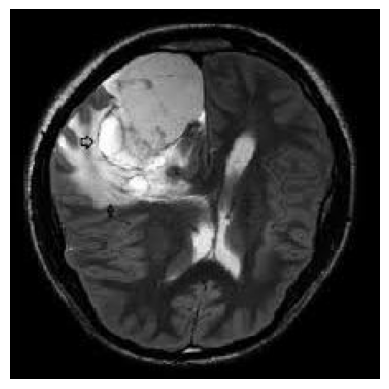

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The MRI is having Tumor


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the image
path = "/content/val/Brain Tumor/Cancer (1015).jpg"
img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img) / 255.0  # Normalize the image

# Display the image
plt.imshow(input_arr)
plt.axis('off')  # Hide axis
plt.show()

# Expand dimensions to match model input shape
input_arr = np.expand_dims(input_arr, axis=0)

# Make a prediction
predictions = model.predict(input_arr)  # Replace 'model' with your actual model variable

# Since this is a binary classification, the output will be a single value between 0 and 1
pred = predictions[0][0]  # Get the predicted probability

# Interpret the prediction
if pred > 0.5:  # Usually, a threshold of 0.5 is used to classify between classes
    print("Healthy")
else:
    print("The MRI is having Tumor")


In [36]:
print("Predicted probabilities:", predictions)


Predicted probabilities: [[1.]]


In [37]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}